In [229]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [230]:
#afficher les données
df_main=pd.read_csv("df_main.csv")
#afficher les données
df_labs=pd.read_csv("df_labs.csv")

In [21]:
#Afficher les 5 premieres lignes
print("afficher les données de df_main:")
df_main.head()

afficher les données de df_main:


,Age,Sexe,Ville,DateTest,Glucose,BloodPressure,Insulin,BMI,Outcome,TestID
0,56,Homme,Marseille,2023-07-07,100,140,200,15,1,34162
1,69,Femme,Tokyo,2021-07-13,400,100,50,30,1,16008
2,46,Homme,Lyon,2023-05-21,400,90,200,18,0,17987
3,32,Homme,Tokyo,2021-03-31,200,120,50,60,1,72532
4,60,Femme,Tokyo,2021-05-02,150,100,100,18,0,13332


In [22]:
#Afficher les 5 premieres lignes  
print("afficher les données de df_labs:")
df_labs.head()

afficher les données de df_labs:


,TestID,Cholesterol,Triglycerides,DateTest,Ville
0,33548,200,50,2021-10-24,Lyon
1,73221,200,100,2023-08-08,Nice
2,47265,200,150,2022-11-11,Marseille
3,50701,200,100,2022-01-13,Lyon
4,61287,200,200,2022-02-25,Lyon


In [23]:
#verifier les données
print("verifier les données de df_main :")
df_main.dtypes

verifier les données de df_main :


Age               int64
Sexe             object
Ville            object
DateTest         object
Glucose           int64
BloodPressure     int64
Insulin           int64
BMI               int64
Outcome           int64
TestID            int64
dtype: object

In [25]:
#verifier les données
print("verifier les données de df_labs :")
df_labs.dtypes

verifier les données de df_labs :


TestID            int64
Cholesterol       int64
Triglycerides     int64
DateTest         object
Ville            object
dtype: object

In [33]:
# cherhcher les doublons
print("doublons pour df_main")
df_main.duplicated().sum()

doublons pour df_main


10

In [34]:
print("doublons pour df_labs")
df_labs.duplicated().sum()

doublons pour df_labs


0

In [35]:
#verifier les valeurs manquantes
print("valeurs manquantes de df_main")
df_main.isnull().sum()

valeurs manquantes de df_main


Age              0
Sexe             0
Ville            0
DateTest         0
Glucose          0
BloodPressure    0
Insulin          0
BMI              0
Outcome          0
TestID           0
dtype: int64

In [63]:
print("valeurs manquantes de df_labs")
df_labs.isnull().sum()

valeurs manquantes de df_labs


TestID           0
Cholesterol      0
Triglycerides    0
DateTest         0
Ville            0
dtype: int64

In [75]:
#identification des valeurs manquantes
cols=['Glucose','BloodPressure','Insulin']
for col in cols:
    df_main[col]=df_main[col].replace(0,np.nan)

In [72]:
df_main.isnull

<bound method DataFrame.isnull of      Age   Sexe      Ville    DateTest  Glucose  BloodPressure  Insulin  BMI  \
0     56  Homme  Marseille  2023-07-07    100.0            140      200   15   
1     69  Femme      Tokyo  2021-07-13    400.0            100       50   30   
2     46  Homme       Lyon  2023-05-21    400.0             90      200   18   
3     32  Homme      Tokyo  2021-03-31    200.0            120       50   60   
4     60  Femme      Tokyo  2021-05-02    150.0            100      100   18   
..   ...    ...        ...         ...      ...            ...      ...  ...   
773   77  Femme      Tokyo  2022-05-30      NaN             80      100   60   
774   24  Femme       Nice  2022-11-01      NaN             80      200   18   
775   29  Femme       Lyon  2022-04-27    200.0            100      100   18   
776   29  Femme       Lyon  2022-04-27    200.0            100      100   18   
777   61  Homme       Lyon  2021-12-26    250.0             90      -45   30   

     

In [79]:
#traitements des données manquantes
df_main['Glucose'].fillna(df_main['Glucose'].median( ))

0      100.0
1      400.0
2      400.0
3      200.0
4      150.0
       ...  
773    200.0
774    200.0
775    200.0
776    200.0
777    250.0
Name: Glucose, Length: 778, dtype: float64

In [167]:
#detection des valeurs
df_main['Insulin']=df_main['Insulin'].apply(lambda x:np.nan if x<0 else x )

In [193]:
data

,TestID,Cholesterol,Triglycerides,DateTest,Ville
0,33548,200,50,2021-10-24,Lyon
1,73221,200,100,2023-08-08,Nice
2,47265,200,150,2022-11-11,Marseille
3,50701,200,100,2022-01-13,Lyon
4,61287,200,200,2022-02-25,Lyon
...,...,...,...,...,...
763,92867,100,50,2023-04-30,Lyon
764,47528,200,300,2023-04-13,Paris
765,88972,250,300,2021-12-05,Tokyo
766,75602,250,100,2022-01-22,Tokyo


In [196]:
df_main['Glucose']=df_main['Glucose'].apply(lambda y:np.nan if y==0 else y)

In [197]:
data.isna

<bound method DataFrame.isna of      TestID  Cholesterol  Triglycerides    DateTest      Ville
0     33548          200             50  2021-10-24       Lyon
1     73221          200            100  2023-08-08       Nice
2     47265          200            150  2022-11-11  Marseille
3     50701          200            100  2022-01-13       Lyon
4     61287          200            200  2022-02-25       Lyon
..      ...          ...            ...         ...        ...
763   92867          100             50  2023-04-30       Lyon
764   47528          200            300  2023-04-13      Paris
765   88972          250            300  2021-12-05      Tokyo
766   75602          250            100  2022-01-22      Tokyo
767   43332          900            150  2023-11-15   Toulouse

[768 rows x 5 columns]>

In [188]:
#valeurs hors des plages plausibles
df_main.loc[(df_main['BloodPressure'] <30)|(df_main['BloodPressure'] >200),'BloodPressure']=np.nan

In [189]:
df_main.isna

<bound method DataFrame.isna of      Age   Sexe      Ville    DateTest  Glucose  BloodPressure  Insulin  BMI  \
0     56  Homme  Marseille  2023-07-07      NaN          140.0     True   15   
1     69  Femme      Tokyo  2021-07-13      NaN          100.0     True   30   
2     46  Homme       Lyon  2023-05-21      NaN           90.0     True   18   
3     32  Homme      Tokyo  2021-03-31      NaN          120.0     True   60   
4     60  Femme      Tokyo  2021-05-02      NaN          100.0     True   18   
..   ...    ...        ...         ...      ...            ...      ...  ...   
763   72  Femme      Tokyo  2023-09-12      NaN          120.0     True   30   
764   30  Homme      Paris  2022-07-02      NaN           80.0     True   25   
765   40  Homme       Nice  2022-12-26      NaN           80.0     True   22   
766   42  Homme   Toulouse  2023-07-15      NaN          120.0     True   15   
767   52  Femme       Lyon  2023-05-26      NaN          140.0     True   15   

     Ou

In [172]:
#Standardisez les données textuelles  
df_main['Sexe'].str.lower().str.strip().replace({'femelle':'femme','masculin':'homme'})

0      homme
1      femme
2      homme
3      homme
4      femme
       ...  
773    femme
774    femme
775    femme
776    femme
777    homme
Name: Sexe, Length: 778, dtype: object

In [173]:
df_main['Ville'].str.title().str.strip()

0      Marseille
1          Tokyo
2           Lyon
3          Tokyo
4          Tokyo
         ...    
773        Tokyo
774         Nice
775         Lyon
776         Lyon
777         Lyon
Name: Ville, Length: 778, dtype: object

In [183]:
#Convertissez toutes les dates au même format 
df_main=df_main[df_main['DateTest'] <=pd.Timestamp.today()]

TypeError: '<=' not supported between instances of 'str' and 'Timestamp'

In [187]:
df_main.drop_duplicates(inplace=True)

In [198]:
df_main.describe()

,Age,Glucose,BloodPressure,BMI,Outcome,TestID
count,768.000000,0.0,768.000000,768.000000,768.000000,768.000000
mean,49.949219,NaN,109.479167,28.609375,0.483073,53126.768229
std,18.071097,NaN,21.634382,15.020057,0.500039,26675.022389
min,18.000000,NaN,80.000000,15.000000,0.000000,10060.000000
25%,35.750000,NaN,90.000000,18.000000,0.000000,30023.000000
50%,50.000000,NaN,100.000000,25.000000,0.000000,50978.000000
75%,66.000000,NaN,130.000000,30.000000,1.000000,77009.000000
max,79.000000,NaN,140.000000,60.000000,1.000000,99962.000000


In [199]:
df_labs.drop_duplicates(inplace=True)

In [200]:
df_labs.describe()

,TestID,Cholesterol,Triglycerides
count,768.000000,768.000000,768.000000
mean,56488.488281,340.559896,155.403646
std,26167.534424,275.366437,86.922427
min,10229.000000,100.000000,50.000000
25%,34553.000000,200.000000,100.000000
50%,57357.000000,250.000000,150.000000
75%,79217.250000,300.000000,200.000000
max,99941.000000,900.000000,300.000000


In [212]:
df_labs=pd.DataFrame({'Nom':[],'DAateNaissance':[]})

In [213]:
df_labs.describe()

,Nom,DAateNaissance
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [217]:
df_main=pd.DataFrame({'Nom':[]})

In [218]:
df_main.describe()

,Nom
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [231]:
df_main_fusion=pd.merge(df_main)

TypeError: merge() missing 1 required positional argument: 'right'

In [232]:
df_merged[pd_merged['_merge']!='both']

NameError: name 'df_merged' is not defined

In [238]:
df_main = pd.read_csv("df_main.csv")  # À adapter selon le nom du fichier

df_main.head()

,Age,Sexe,Ville,DateTest,Glucose,BloodPressure,Insulin,BMI,Outcome,TestID
0,56,Homme,Marseille,2023-07-07,100,140,200,15,1,34162
1,69,Femme,Tokyo,2021-07-13,400,100,50,30,1,16008
2,46,Homme,Lyon,2023-05-21,400,90,200,18,0,17987
3,32,Homme,Tokyo,2021-03-31,200,120,50,60,1,72532
4,60,Femme,Tokyo,2021-05-02,150,100,100,18,0,13332


In [245]:
df_labs = pd.read_csv("df_labs.csv")  

df_labs.head()

,TestID,Cholesterol,Triglycerides,DateTest,Ville
0,33548,200,50,2021-10-24,Lyon
1,73221,200,100,2023-08-08,Nice
2,47265,200,150,2022-11-11,Marseille
3,50701,200,100,2022-01-13,Lyon
4,61287,200,200,2022-02-25,Lyon


In [243]:
# Variables principales à explorer (ajoutez 'Cholesterol' si disponible)
variables = ['Glucose', 'BMI', 'BloodPressure']
variables = ['Cholesterol']

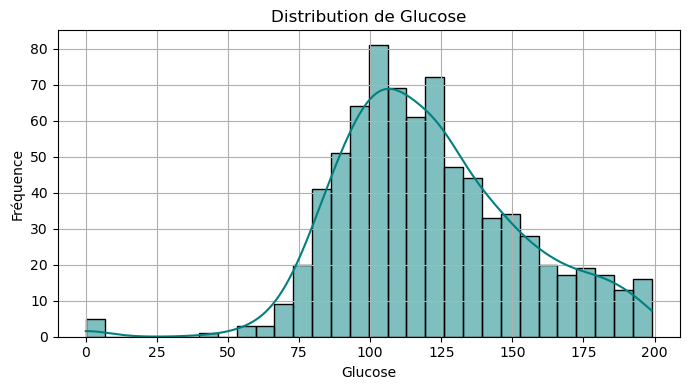

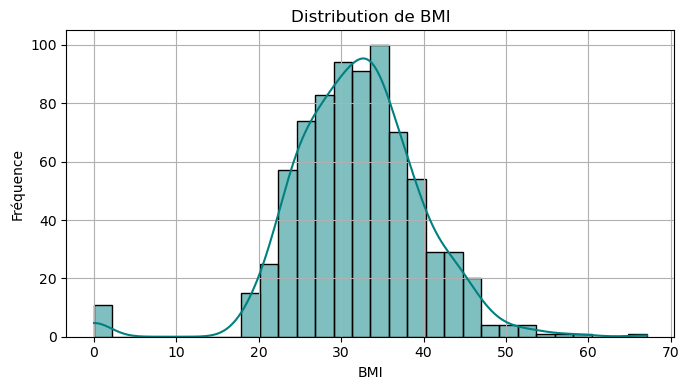

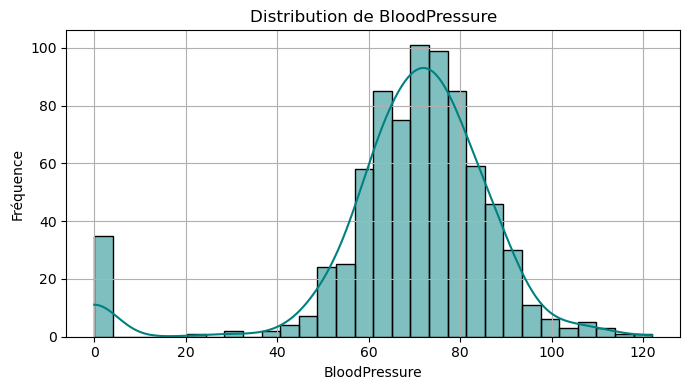

KeyError: 'Cholesterol'

<Figure size 700x400 with 0 Axes>

In [246]:
# Affichage des distributions
for var in variables:
    plt.figure(figsize=(7, 4))
    sns.histplot(df[var], kde=True, bins=30, color='teal')
    plt.title(f'Distribution de {var}')
    plt.xlabel(var)
    plt.ylabel('Fréquence')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [254]:
#Charger le fichier CSV
df_main = pd.read_csv("df_main.csv")

In [255]:
#Calculer les corrélations avec la variable cible 'Outcome'
correlations = df_main.corr(numeric_only=True)['Outcome'].sort_values(ascending=False)

In [260]:
# Afficher les résultats
print(correlations)

Outcome          1.000000
Age              0.054507
Insulin          0.022108
BMI              0.003441
Glucose         -0.016716
TestID          -0.035460
BloodPressure   -0.052465
Name: Outcome, dtype: float64


In [273]:
def age_group(age):
    if age < 30:
        return 'Jeune'
    elif age < 50:
        return 'Adulte'
    else:
        return 'Senior'

df['Age_Group'] = df['Age'].apply(age_group)

In [277]:
df['High_Glucose'] = df['Glucose'].apply(lambda x: 1 if x >= 140 else 0)
